# Main Library

In [1]:
# reading data& visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# train&Test
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
# Hyper Parameter 
from sklearn.model_selection import GridSearchCV

In [2]:
# DATA

data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Gold_priceData\gld_price_data.csv")
data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [3]:
# information From data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### No null value in data

In [5]:
# statstic Data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


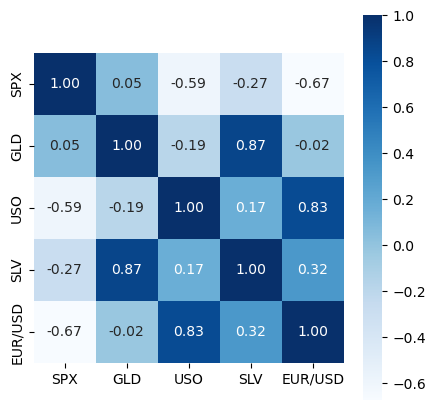

In [6]:
# Getting correlation in Data

plt.figure(figsize=(5 ,5))
sns.heatmap(data=data.corr(), annot=True, fmt="0.2f", square=True, cbar=True, cmap="Blues");


#### Correlaction Between 
        1 ==> (Eur/USD, SLV, USO) Are Very Good
        2 ==> (Eur/USD, SPX) Is Good
        3 ==> (Eur/USD, GLD) Is Bad

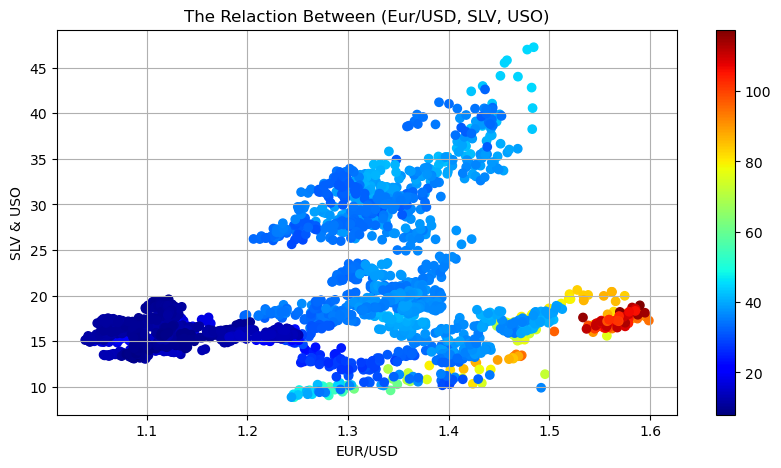

In [7]:
plt.figure(figsize=(10, 5))

z = plt.scatter(x=data["EUR/USD"], y=data["SLV"], c=data["USO"], cmap=plt.get_cmap("jet"), marker="o")
plt.colorbar(z)
plt.title("The Relaction Between (Eur/USD, SLV, USO)")
plt.xlabel("EUR/USD")
plt.ylabel("SLV & USO")

plt.grid()

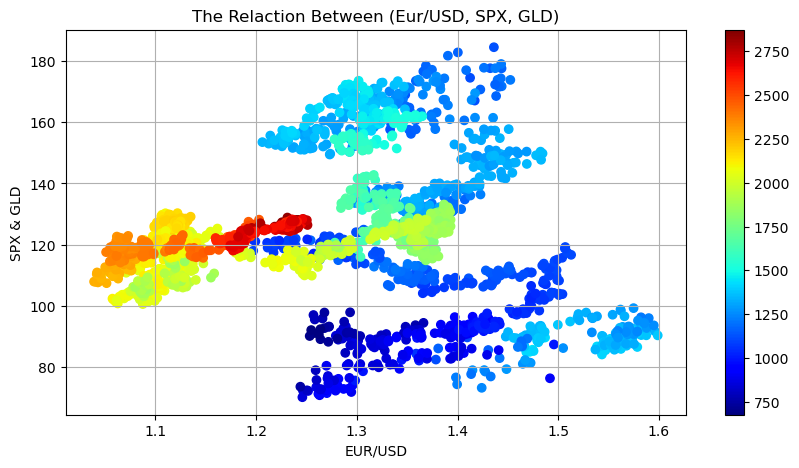

In [8]:
plt.figure(figsize=(10, 5))

z = plt.scatter(x=data["EUR/USD"], y=data["GLD"], c=data["SPX"], cmap=plt.get_cmap("jet"), marker="o")
plt.colorbar(z)
plt.title("The Relaction Between (Eur/USD, SPX, GLD)")
plt.xlabel("EUR/USD")
plt.ylabel("SPX & GLD")

plt.grid()

<AxesSubplot:>

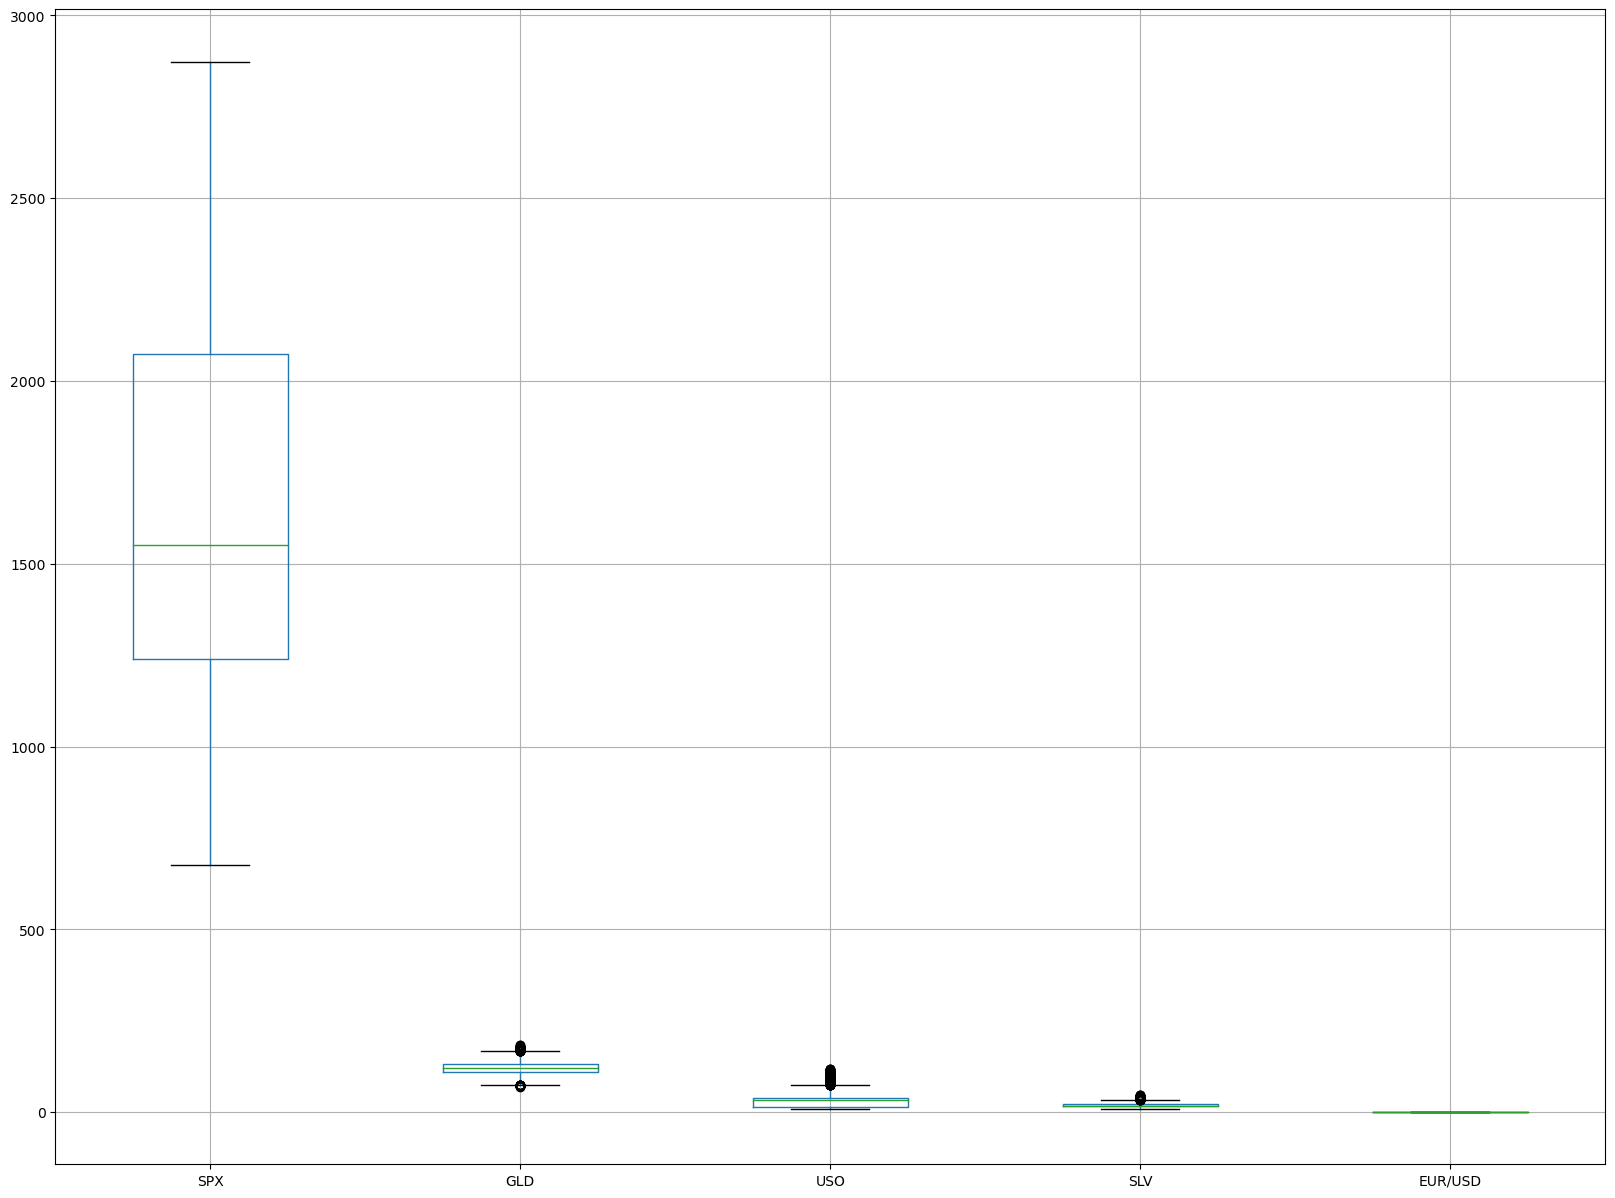

In [9]:
data.boxplot(figsize=(20 ,15))

<AxesSubplot:ylabel='Density'>

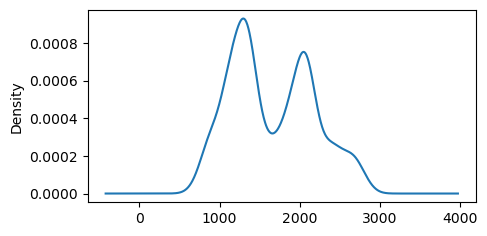

In [10]:
data["SPX"].plot(kind="density",figsize=(5 ,2.5))

<AxesSubplot:ylabel='Density'>

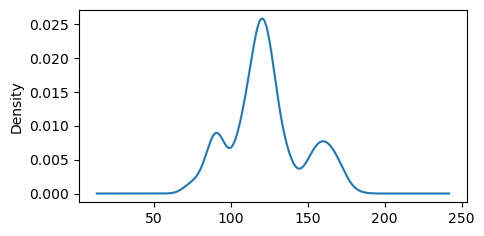

In [11]:
data["GLD"].plot(kind="density",figsize=(5 ,2.5))

<AxesSubplot:ylabel='Density'>

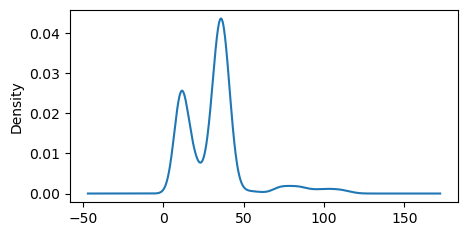

In [12]:
data["USO"].plot(kind="density",figsize=(5 ,2.5))

#### Comments For Analsis Data
        1==> Data is None Have Null Value 
        2 ==> Exist A very Good Relation Between Target(USD/ERO) ==> USO & SLV
        3 ==> Exist A Good Relation Between Target(USD/ERO) ==> SPX
        4 ==> Exist A bad Relation Between Target(USD/ERO) ==> GLD
        5 ==> Data mean Value in all Columns in mid.

# Splitting Data

In [13]:
X = data.drop(columns=["EUR/USD", "Date"], axis=1)
Y = data["EUR/USD"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [14]:
print(X)

              SPX         GLD        USO      SLV
0     1447.160034   84.860001  78.470001  15.1800
1     1447.160034   85.570000  78.370003  15.2850
2     1411.630005   85.129997  77.309998  15.1670
3     1416.180054   84.769997  75.500000  15.0530
4     1390.189941   86.779999  76.059998  15.5900
...           ...         ...        ...      ...
2285  2671.919922  124.589996  14.060000  15.5100
2286  2697.790039  124.330002  14.370000  15.5300
2287  2723.070068  125.180000  14.410000  15.7400
2288  2730.129883  124.489998  14.380000  15.5600
2289  2725.780029  122.543800  14.405800  15.4542

[2290 rows x 4 columns]


# model 1 ==>Linear Regrassion

In [15]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

print("The Train Prediction is ==> ", Lin_reg.score(x_train, y_train))
print("The Test Prediction is ==> " , Lin_reg.score(x_test, y_test))

The Train Prediction is ==>  0.7607555624905796
The Test Prediction is ==>  0.755800506944


# model 2 ==> Random Forest

In [16]:
model_RF = RandomForestRegressor(n_estimators=2000, max_depth=500)
model_RF.fit(x_train, y_train)

print("The Train Prediction is ==> ", model_RF.score(x_train, y_train))
print("The Test Prediction is ==> " , model_RF.score(x_test, y_test))

The Train Prediction is ==>  0.9972949015334879
The Test Prediction is ==>  0.9806441229352676


In [17]:
param = {"n_estimators":np.arange(10, 25, 2),
         "max_depth": np.arange(9, 11, 1),
         "min_samples_split": [2, 3 , 4]}

new_model = GridSearchCV(estimator=model_RF,
                         param_grid=param,
                         cv=10,
                         n_jobs=-1)
new_model.fit(x_train, y_train)

new_model.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=16)

# Model 3 ==>AdaBoostRegressor

In [18]:
model_AD1 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=500),
                              n_estimators=1000,
                              learning_rate=0.5,
                              loss="exponential")


model_AD1.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD1.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD1.score(x_test, y_test)}")

The predict Score Train is ==> 0.99997281692803
%----------------------------------------------------------%
The predict Score Test is ==> 0.9832221493642129



#### Linear Regression    
        The Train Prediction is ==>  0.7607555624905796
        The Test Prediction is ==>  0.755800506944

#### RandomForestRegressor
        The Train Prediction is ==>  0.9972748253360909
        The Test Prediction is ==>  0.9806739680195898
#### AdaBoostRegressor
        The predict Score Train is ==> 0.9999542892603869
        The predict Score Test is ==> 0.9832471739980122
        
### Train_size == 70% , Test_size == 30%


In [19]:
model_xgb = xgb.XGBRFRegressor(n_estimators=500, max_depth=50, max_delta_step=2, 
                               learning_rate=1)
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.9991861466431294
%----------------------------------------------------------%
The predict Score Test is ==> 0.9811434594892159
